## Lab Assignment 07

In [98]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.optimize import fmin_tnc
from sklearn.metrics import precision_score, recall_score, f1_score

## Importing Data

In [99]:
# Loading the Dataset from text file
df = pd.read_csv('student_marks.txt',header=None,names = ["exam1", "exam2", "admitted"])

df.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [100]:
# Shuffling Dataset with seed 42
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,exam1,exam2,admitted
0,57.238706,59.514282,1
1,34.524514,60.396342,0
2,32.722833,43.307173,0
3,62.222676,52.060992,0
4,51.047752,45.822701,0


In [101]:
# Splitting into Trainig and testing Dataset
train_size = int(0.7 * len(df))
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

In [102]:
# Checking column Datatypes
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   exam1     70 non-null     float64
 1   exam2     70 non-null     float64
 2   admitted  70 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 70 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   exam1     30 non-null     float64
 1   exam2     30 non-null     float64
 2   admitted  30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [103]:
# Displaying Mean value and categorical counts
print("Mean Values:")
print(df.mean())

print("\nCategorical Values:")
print(df['admitted'].value_counts())

Mean Values:
exam1       65.644274
exam2       66.221998
admitted     0.600000
dtype: float64

Categorical Values:
admitted
1    60
0    40
Name: count, dtype: int64


## Data Visualisation
***Task :*** 
Create a scatter plot using the training set and mark the points differently for different classes

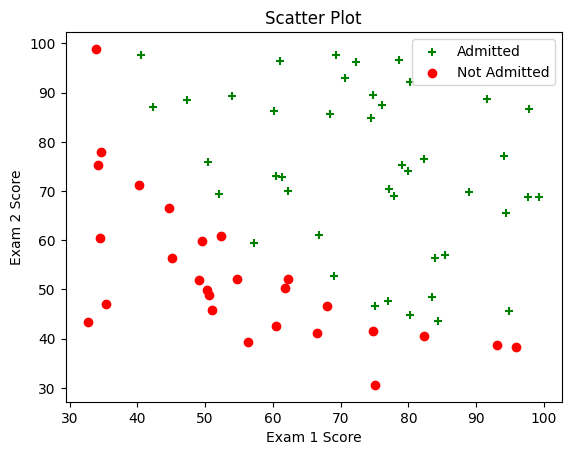

In [104]:
plt.scatter(train_df[train_df['admitted'] == 1]['exam1'], train_df[train_df['admitted'] == 1]['exam2'], label='Admitted', marker='+', color='green')
plt.scatter(train_df[train_df['admitted'] == 0]['exam1'], train_df[train_df['admitted'] == 0]['exam2'], label='Not Admitted', marker='o', color='red')

plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.title("Scatter Plot")
plt.show()

## Classification Using Logistic Regression

In [105]:
# Class for Logistic Regression
class MyLogisticRegression:
    def __init__(self):
        self.theta = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def h_theta_x(self, theta, x):
        return self.sigmoid(np.dot(x, theta))
    
    def cost_function(self, theta, x, y):
        m = len(y)
        h = self.h_theta_x(theta, x)
        return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    def gradient(self, theta, x, y):
        m = len(y)
        return (1 / m) * np.dot(x.T, self.h_theta_x(theta, x) - y)
    
    def fit(self, x, y):
        theta = np.zeros(x.shape[1])
        self.theta = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient, args=(x, y))[0]
        return self.theta


In [106]:
# # Prepare data for logistic regression
x_train = train_df[['exam1', 'exam2']].values
y_train = train_df['admitted'].values

x_test = test_df[['exam1', 'exam2']].values
y_test = test_df['admitted'].values

# Train model
model = LogisticRegression()
model.fit(x_train, y_train)

theta = np.hstack([model.intercept_, model.coef_.flatten()])

print("Learned Parameters (Theta):", theta)


Learned Parameters (Theta): [-23.81709234   0.18683586   0.20385018]


In [107]:




# predictions = model.predict(x_test)
predictions = model.predict(x_test)

# recall = model.recall(x_test)
# f1_score = model.f1_score(x_test)

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1_score = f1_score(y_test, predictions)


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)



Precision: 0.8421052631578947
Recall: 0.9411764705882353
F1 Score: 0.8888888888888888


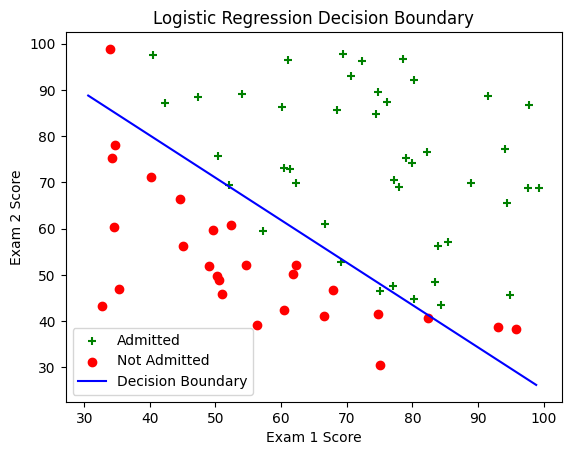

In [108]:
x_values = [min(x_train[:, 1]), max(x_train[:, 1])]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]

plt.scatter(train_df[train_df['admitted'] == 1]['exam1'], train_df[train_df['admitted'] == 1]['exam2'], label="Admitted", marker="+", color="green")
plt.scatter(train_df[train_df['admitted'] == 0]['exam1'], train_df[train_df['admitted'] == 0]['exam2'], label="Not Admitted", marker="o", color="red")

plt.plot(x_values, y_values, label="Decision Boundary", color="blue")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.show()

## Question 1

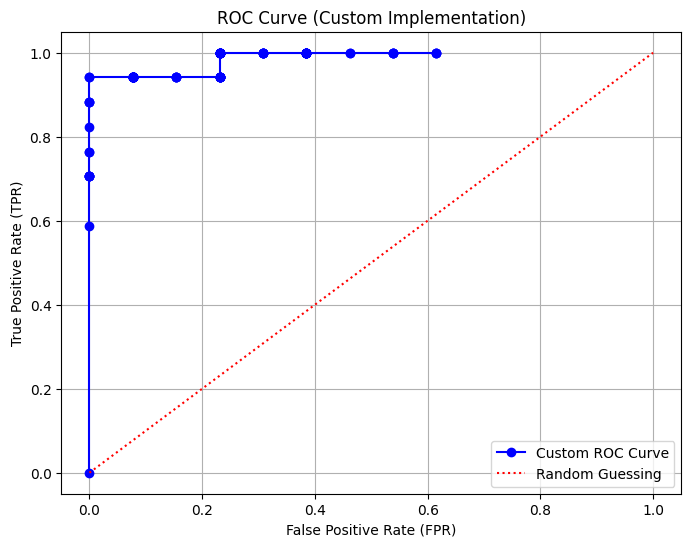

In [ ]:
y_probs = model.predict_proba(x_test)[:, 1] 

def roc(y_test, y_probs):
    thresholds = np.linspace(0.01, 1.00, 100)  
    tpr_list = []  
    fpr_list = [] 

    for i in thresholds:
        y_pred = (y_probs >= i).astype(int)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        tpr = tp / (tp + fn) if (tp + fn) != 0 else 0 
        fpr = fp / (fp + tn) if (fp + tn) != 0 else 0 

        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return fpr_list, tpr_list

fpr_values, tpr_values = roc(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, marker='o', label="Custom ROC Curve", color="blue")
plt.plot([0, 1], [0, 1], linestyle="dotted", color="red", label="Random Guessing")  # Random prediction line

plt.xlabel("(FPR)")
plt.ylabel("(TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
